# MEE4006 CFD Lab
# Exercise 0 - Explicit

# This code solves the 1D heat conduction equation with fixed temperatures at both ends (Dritchlet type), without sources

## Governing equation
$\frac{\partial T}{\partial t} = \alpha  \frac{\partial^2 T}{\partial x^2} $

## Domain and material
$x \in [0,1]$

$\alpha = 1.0 m^2/s $


## Boundary conditions
At $x=0, T_0 = 373 K$ 



At $x=1, T_1 = 303 K$

## Grid 

Find the optimal number of points needed to obtain grid converged solution.

## Numerical method - implicit scheme

We implement the spacing marching method in space, using second-order central difference.
Refer to class lectures.


## Error

We find the L2-norm of the error i.e., the rate at which the solution changes

$ L_2 Norm = \sqrt{ \Sigma x_i^2 } $


# Exercise
## 1. Generate the line plot, and the contour plot, for T_left=150K, T_right = 500K
## 2. Comment on the effect of grid size on the rate of convergence
## 3. What happens if the $\Delta t$ is multiplied by (i) 0.5, (ii) >0.5 ? And why ?

In [757]:
import numpy as np # math library
import matplotlib.pyplot as plt # library for plotting
np.set_printoptions(precision=10) # sets the prcision for numbers - while printing

In [758]:
# Define parameters
N = 26
max_iter = 12000

time = 1.0
alpha = 1
T_left = 373.0
T_right = 303.0
T_guess = 300.0

In [759]:
# create grid from [0,N-1]
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(0.0, 1.0, N, endpoint=True, dtype=np.float64) 
dx = x[1]-x[0]
dt = 0.5*(dx**2)/alpha # See eqn 4.77 from John D Anderson
print('dx,dt = ',dx, dt)
x

dx,dt =  0.04 0.0008


array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  ])

In [760]:
# find max iterations based on total runtime and dt
max_iter = int(time/dt)+10 # we need a bit more number of iterations to get to the exact time 
error = np.zeros(max_iter,dtype=np.float64)
max_iter # expected number of iterations

1260

In [761]:
# Create the data arrays
T = np.linspace(T_guess, T_guess, N, dtype=np.float64)
T_old = np.linspace(T_guess, T_guess, N, dtype=np.float64 )

In [762]:
T

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300.])

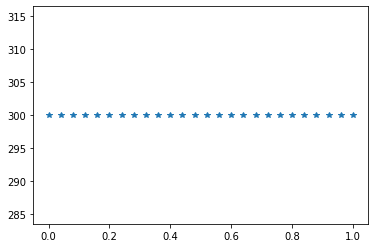

In [763]:
# plot initial condition
plt.plot(x,T,'*')

## Lets create the linear system based on 



$ AT^{n+1}_{i-1} - B T^{n+1}_{i} + AT^{n+1}_{i+1} = K_i $



In [764]:
# Create the coefficient matrix
A = alpha*dt/(2*dx**2)
B = 1 + 2*A

# matrix is of (internal points by internal points)
# So we have (N-2) x (N-2) as the matrix dimension

matrix = np.zeros( (N-2,N-2),dtype=np.float64)
print(A,B)

0.25 1.5


In [765]:
# Set the values of the matrix based on A,B the constants
for i in range(0,N-2):
    for j in range(0,N-2):
        
        # set main diagonal
        if(i==j):
            matrix[i][j]= -B

for i in range(0,N-3):
    # lower diagonal
    if(i<(N-1)):
        matrix[i][i+1]= A

for i in range(0,N-2):        
    # upper diagonal
    if(i>0):
        matrix[i][i-1]= A
            

In [766]:
matrix # print and check the coeeficient matrix

array([[-1.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.25, -1.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25, -1.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25, -1.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25, -1.5 ,  0.25,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,

In [767]:
# find the inverse of the matrix
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
invmatrix = np.linalg.inv(matrix)
invmatrix

array([[-6.8629150102e-01, -1.1774900609e-01, -2.0202535533e-02,
        -3.4662071089e-03, -5.9470711990e-04, -1.0203561049e-04,
        -1.7506543071e-05, -3.0036479304e-06, -5.1534451167e-07,
        -8.8419139614e-08, -1.5170326011e-08, -2.6028164522e-09,
        -4.4657270247e-10, -7.6619762573e-11, -1.3145872966e-11,
        -2.2554752225e-12, -3.8697836898e-13, -6.6394991426e-14,
        -1.1391579574e-14, -1.9544860193e-15, -3.3533654158e-16,
        -5.7533230173e-17, -9.8628394582e-18, -1.6438065764e-18],
       [-1.1774900609e-01, -7.0649403655e-01, -1.2121521320e-01,
        -2.0797242653e-02, -3.5682427194e-03, -6.1221366297e-04,
        -1.0503925842e-04, -1.8021887582e-05, -3.0920670700e-06,
        -5.3051483768e-07, -9.1021956066e-08, -1.5616898713e-08,
        -2.6794362148e-09, -4.5971857544e-10, -7.8875237795e-11,
        -1.3532851335e-11, -2.3218702139e-12, -3.9836994856e-13,
        -6.8349477445e-14, -1.1726916116e-14, -2.0120192495e-15,
        -3.4519938104e-1

In [768]:
ts=0.0 # store simulation time
dt_temp=dt # we will need to change dt as the simulation time reaches time

for i in range(0,max_iter):
    
    T_old = T.copy() # copy one array to another
    
    # set BCs
    T_old[0] = T_left
    T_old[N-1] = T_right

    # calculate the RHS of the linear system i.e. K column
    # Note that K is function of temperature at T_old only at internal points
    #######################################################
    K = np.zeros(N-2,dtype=np.float64) # 0:N-3
    
    # Note that K starts for intenal points
    for j in range(0,N-2):
        j1 = j+1
        K[j] = -T_old[j1] - (alpha*dt_temp*0.5/dx**2)*( T_old[j1+1] - 2*T_old[j1] + T_old[j1-1] )
    
    # Remeber that the first and the last K values are K prime values 
    # These values are the boundary values
    K[0] = K[0] - A*T_left
    K[N-3] = K[N-3] - A*T_right
    
    # Now lets solve the linear system by matrix*T = K
    # We can use any linear solver of our choice
    ####################################################
    # https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.linalg.solve.html
    
    Ttmp = np.linalg.solve(matrix,K)
    
    
    # Get T array
    ##############
    T[0] = T_left
    T[N-1] = T_right
    T[1:N-1]=Ttmp[0:N-2].copy()
    
    
    # update time of the simulation
    ts = ts+dt_temp  
    
    # compute error
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
    # https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
    error[i]=np.linalg.norm(np.subtract(T,T_old),2)     

    print('Iteration = ',i,'Time = ', ts, 'dt = ',dt_temp, 'error =', error[i] )
    if(ts==time):# or error[i]<1e-2):
        print('Reached time', ts, 'error = ', error[i])
        break
    
    # change 'dt' when simulation time (ts) is close to time (time)
    if( (ts+dt_temp) >= time):
        dt_temp = time-ts
        print('Changed dt = ',dt_temp)
            

Iteration =  0 Time =  0.0008 dt =  0.0008 error = 25.448143231312045
Iteration =  1 Time =  0.0016 dt =  0.0008 error = 13.258619617993793
Iteration =  2 Time =  0.0024000000000000002 dt =  0.0008 error = 9.344801053107876
Iteration =  3 Time =  0.0032 dt =  0.0008 error = 7.358714149097883
Iteration =  4 Time =  0.004 dt =  0.0008 error = 6.1382853661675885
Iteration =  5 Time =  0.0048000000000000004 dt =  0.0008 error = 5.303979746449636
Iteration =  6 Time =  0.005600000000000001 dt =  0.0008 error = 4.693404682903164
Iteration =  7 Time =  0.006400000000000001 dt =  0.0008 error = 4.22487993100125
Iteration =  8 Time =  0.0072000000000000015 dt =  0.0008 error = 3.8525994672445
Iteration =  9 Time =  0.008000000000000002 dt =  0.0008 error = 3.548776149465405
Iteration =  10 Time =  0.008800000000000002 dt =  0.0008 error = 3.295520263763274
Iteration =  11 Time =  0.009600000000000003 dt =  0.0008 error = 3.0807640954587825
Iteration =  12 Time =  0.010400000000000003 dt =  0.00

Iteration =  180 Time =  0.14479999999999957 dt =  0.0008 error = 0.3246485036657657
Iteration =  181 Time =  0.14559999999999956 dt =  0.0008 error = 0.322093555483662
Iteration =  182 Time =  0.14639999999999956 dt =  0.0008 error = 0.31955894472824914
Iteration =  183 Time =  0.14719999999999955 dt =  0.0008 error = 0.3170444972315633
Iteration =  184 Time =  0.14799999999999955 dt =  0.0008 error = 0.31455004096458933
Iteration =  185 Time =  0.14879999999999954 dt =  0.0008 error = 0.31207540597916084
Iteration =  186 Time =  0.14959999999999954 dt =  0.0008 error = 0.30962042435295034
Iteration =  187 Time =  0.15039999999999953 dt =  0.0008 error = 0.3071849301365011
Iteration =  188 Time =  0.15119999999999953 dt =  0.0008 error = 0.30476875930276953
Iteration =  189 Time =  0.15199999999999952 dt =  0.0008 error = 0.3023717496989311
Iteration =  190 Time =  0.15279999999999952 dt =  0.0008 error = 0.2999937410007443
Iteration =  191 Time =  0.15359999999999951 dt =  0.0008 err

Iteration =  347 Time =  0.27839999999999976 dt =  0.0008 error = 0.08696887611446621
Iteration =  348 Time =  0.2791999999999998 dt =  0.0008 error = 0.08628579318216312
Iteration =  349 Time =  0.2799999999999998 dt =  0.0008 error = 0.08560807543766608
Iteration =  350 Time =  0.2807999999999998 dt =  0.0008 error = 0.08493568073967608
Iteration =  351 Time =  0.28159999999999985 dt =  0.0008 error = 0.0842685672778452
Iteration =  352 Time =  0.2823999999999999 dt =  0.0008 error = 0.08360669357006456
Iteration =  353 Time =  0.2831999999999999 dt =  0.0008 error = 0.08295001846049407
Iteration =  354 Time =  0.2839999999999999 dt =  0.0008 error = 0.08229850111631144
Iteration =  355 Time =  0.28479999999999994 dt =  0.0008 error = 0.08165210102566496
Iteration =  356 Time =  0.28559999999999997 dt =  0.0008 error = 0.08101077799478058
Iteration =  357 Time =  0.2864 dt =  0.0008 error = 0.08037449214576131
Iteration =  358 Time =  0.2872 dt =  0.0008 error = 0.07974320391395334
I

Iteration =  501 Time =  0.4016000000000033 dt =  0.0008 error = 0.025821510569917147
Iteration =  502 Time =  0.4024000000000033 dt =  0.0008 error = 0.025618699857956628
Iteration =  503 Time =  0.40320000000000333 dt =  0.0008 error = 0.025417482088629803
Iteration =  504 Time =  0.40400000000000336 dt =  0.0008 error = 0.02521784475044338
Iteration =  505 Time =  0.4048000000000034 dt =  0.0008 error = 0.025019775430168645
Iteration =  506 Time =  0.4056000000000034 dt =  0.0008 error = 0.02482326181212652
Iteration =  507 Time =  0.4064000000000034 dt =  0.0008 error = 0.024628291677113775
Iteration =  508 Time =  0.40720000000000345 dt =  0.0008 error = 0.02443485290230738
Iteration =  509 Time =  0.40800000000000347 dt =  0.0008 error = 0.02424293345982828
Iteration =  510 Time =  0.4088000000000035 dt =  0.0008 error = 0.024052521416304772
Iteration =  511 Time =  0.4096000000000035 dt =  0.0008 error = 0.023863604932213674
Iteration =  512 Time =  0.41040000000000354 dt =  0.0

Iteration =  627 Time =  0.5024000000000062 dt =  0.0008 error = 0.009560644154733127
Iteration =  628 Time =  0.5032000000000062 dt =  0.0008 error = 0.009485551683274092
Iteration =  629 Time =  0.5040000000000062 dt =  0.0008 error = 0.009411049012986587
Iteration =  630 Time =  0.5048000000000062 dt =  0.0008 error = 0.009337131511310463
Iteration =  631 Time =  0.5056000000000063 dt =  0.0008 error = 0.009263794582259408
Iteration =  632 Time =  0.5064000000000063 dt =  0.0008 error = 0.009191033665811586
Iteration =  633 Time =  0.5072000000000063 dt =  0.0008 error = 0.009118844237731077
Iteration =  634 Time =  0.5080000000000063 dt =  0.0008 error = 0.009047221809387378
Iteration =  635 Time =  0.5088000000000064 dt =  0.0008 error = 0.00897616192736279
Iteration =  636 Time =  0.5096000000000064 dt =  0.0008 error = 0.00890566017317771
Iteration =  637 Time =  0.5104000000000064 dt =  0.0008 error = 0.008835712163214373
Iteration =  638 Time =  0.5112000000000064 dt =  0.0008

Iteration =  804 Time =  0.6440000000000102 dt =  0.0008 error = 0.0023677733665898697
Iteration =  805 Time =  0.6448000000000103 dt =  0.0008 error = 0.002349176088940379
Iteration =  806 Time =  0.6456000000000103 dt =  0.0008 error = 0.00233072488054417
Iteration =  807 Time =  0.6464000000000103 dt =  0.0008 error = 0.0023124185938958454
Iteration =  808 Time =  0.6472000000000103 dt =  0.0008 error = 0.0022942560909823585
Iteration =  809 Time =  0.6480000000000103 dt =  0.0008 error = 0.0022762362424289936
Iteration =  810 Time =  0.6488000000000104 dt =  0.0008 error = 0.002258357927730409
Iteration =  811 Time =  0.6496000000000104 dt =  0.0008 error = 0.0022406200352706293
Iteration =  812 Time =  0.6504000000000104 dt =  0.0008 error = 0.0022230214619338544
Iteration =  813 Time =  0.6512000000000104 dt =  0.0008 error = 0.0022055611137785044
Iteration =  814 Time =  0.6520000000000105 dt =  0.0008 error = 0.002188237904985672
Iteration =  815 Time =  0.6528000000000105 dt =

Iteration =  927 Time =  0.742400000000013 dt =  0.0008 error = 0.0008976753891342593
Iteration =  928 Time =  0.7432000000000131 dt =  0.0008 error = 0.000890624748808566
Iteration =  929 Time =  0.7440000000000131 dt =  0.0008 error = 0.0008836294864733057
Iteration =  930 Time =  0.7448000000000131 dt =  0.0008 error = 0.0008766891672666361
Iteration =  931 Time =  0.7456000000000131 dt =  0.0008 error = 0.0008698033596912089
Iteration =  932 Time =  0.7464000000000132 dt =  0.0008 error = 0.0008629716354914083
Iteration =  933 Time =  0.7472000000000132 dt =  0.0008 error = 0.0008561935700046661
Iteration =  934 Time =  0.7480000000000132 dt =  0.0008 error = 0.000849468741516242
Iteration =  935 Time =  0.7488000000000132 dt =  0.0008 error = 0.0008427967322247114
Iteration =  936 Time =  0.7496000000000133 dt =  0.0008 error = 0.000836177126901845
Iteration =  937 Time =  0.7504000000000133 dt =  0.0008 error = 0.0008296095144320485
Iteration =  938 Time =  0.7512000000000133 dt 

Iteration =  1063 Time =  0.8512000000000162 dt =  0.0008 error = 0.00030717030797677044
Iteration =  1064 Time =  0.8520000000000162 dt =  0.0008 error = 0.00030475769045479903
Iteration =  1065 Time =  0.8528000000000162 dt =  0.0008 error = 0.00030236402250815426
Iteration =  1066 Time =  0.8536000000000162 dt =  0.0008 error = 0.00029998915514473605
Iteration =  1067 Time =  0.8544000000000163 dt =  0.0008 error = 0.0002976329407607272
Iteration =  1068 Time =  0.8552000000000163 dt =  0.0008 error = 0.0002952952328226392
Iteration =  1069 Time =  0.8560000000000163 dt =  0.0008 error = 0.00029297588613813916
Iteration =  1070 Time =  0.8568000000000163 dt =  0.0008 error = 0.00029067475634782675
Iteration =  1071 Time =  0.8576000000000163 dt =  0.0008 error = 0.000288391700357432
Iteration =  1072 Time =  0.8584000000000164 dt =  0.0008 error = 0.00028612657622287274
Iteration =  1073 Time =  0.8592000000000164 dt =  0.0008 error = 0.00028387924320767314
Iteration =  1074 Time = 

Iteration =  1209 Time =  0.9680000000000195 dt =  0.0008 error = 9.713898325562559e-05
Iteration =  1210 Time =  0.9688000000000195 dt =  0.0008 error = 9.637602138625237e-05
Iteration =  1211 Time =  0.9696000000000196 dt =  0.0008 error = 9.56190521206326e-05
Iteration =  1212 Time =  0.9704000000000196 dt =  0.0008 error = 9.48680283309973e-05
Iteration =  1213 Time =  0.9712000000000196 dt =  0.0008 error = 9.412290344660437e-05
Iteration =  1214 Time =  0.9720000000000196 dt =  0.0008 error = 9.33836309871905e-05
Iteration =  1215 Time =  0.9728000000000196 dt =  0.0008 error = 9.265016488079813e-05
Iteration =  1216 Time =  0.9736000000000197 dt =  0.0008 error = 9.192245971414292e-05
Iteration =  1217 Time =  0.9744000000000197 dt =  0.0008 error = 9.120047021622924e-05
Iteration =  1218 Time =  0.9752000000000197 dt =  0.0008 error = 9.048415152490357e-05
Iteration =  1219 Time =  0.9760000000000197 dt =  0.0008 error = 8.977345898252595e-05
Iteration =  1220 Time =  0.9768000

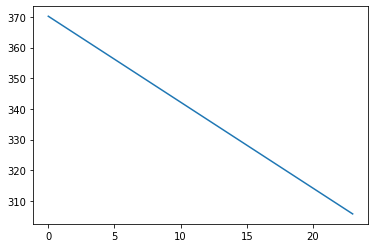

In [769]:
plt.plot(Ttmp)

In [770]:
ts, dt, time, dt_temp

(1.0, 0.0008, 1.0, 0.0007999999999795948)

In [771]:
T

array([373.          , 370.1996826865, 367.3993703771, 364.5990679973,
       361.7987803158, 358.9985118694, 356.1982668917, 353.3980492462,
       350.5978623652, 347.797709196 , 344.9975921541, 342.1975130854,
       339.3974732368, 336.5974732368, 333.7975130854, 330.9975921541,
       328.197709196 , 325.3978623652, 322.5980492462, 319.7982668917,
       316.9985118694, 314.1987803158, 311.3990679973, 308.5993703771,
       305.7996826865, 303.          ])

In [772]:
T_old

array([373.          , 370.1996801744, 367.3993653927, 364.5990606191,
       361.7987706602, 358.9985000886, 356.1982531715, 353.398033803 ,
       350.5978454426, 347.7976910608, 344.9975730924, 342.1974933977,
       339.3974532337, 336.5974532337, 333.7974933977, 330.9975730924,
       328.1976910608, 325.3978454426, 322.598033803 , 319.7982531715,
       316.9985000886, 314.1987706602, 311.3990606191, 308.5993653927,
       305.7996801744, 303.          ])

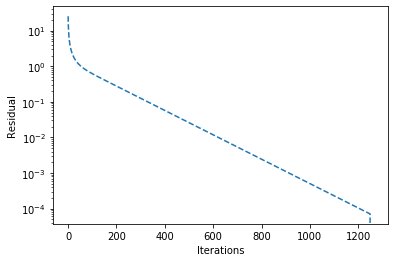

In [773]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html
plt.xlabel('Iterations')
plt.ylabel('Residual')
plt.yscale('log') # set log scale in y
plt.plot(np.arange(max_iter),error,'--')
plt.show()

In [774]:
# Lets computet he anlytical solution
T_analytical = (T_right-T_left)*x+T_left


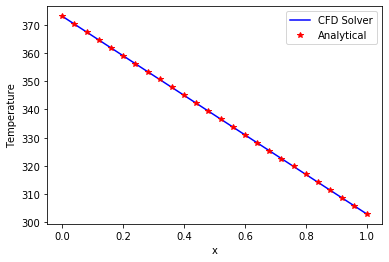

In [775]:
# plot final condition
# https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.xlabel('x')
plt.ylabel('Temperature')
plt.plot(x,T,'b-',label='CFD Solver')
plt.plot(x, T_analytical,'r*',label='Analytical')
plt.legend() 
plt.show()


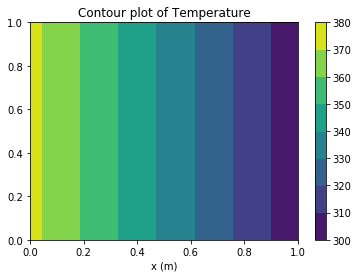

In [776]:
# contour plot
#############################
X, Y = np.meshgrid(x,x ) # create a dummy 2D grid 
# https://numpy.org/doc/stable/reference/generated/numpy.tile.html
# copy the 1D data to a 2D array
T2D = np.tile(T,(N,1))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T2D)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
plt.show()